In [2]:
import matplotlib.pyplot as plt
import numpy as np

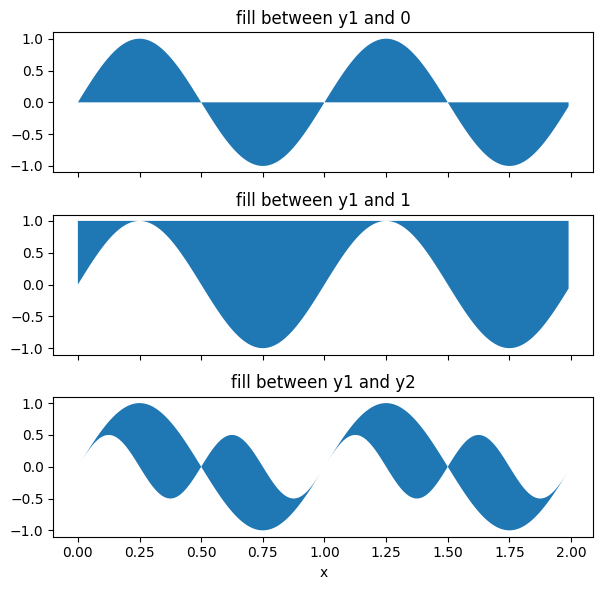

In [6]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.5 * np.sin(4 * np.pi *x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, figsize = (6, 6))

ax1.fill_between(x, y1)
ax1.set_title("fill between y1 and 0")

ax2.fill_between(x, y1, 1)
ax2.set_title("fill between y1 and 1")

ax3.fill_between(x, y1, y2)
ax3.set_title("fill between y1 and y2")
ax3.set_xlabel("x")
fig.tight_layout()

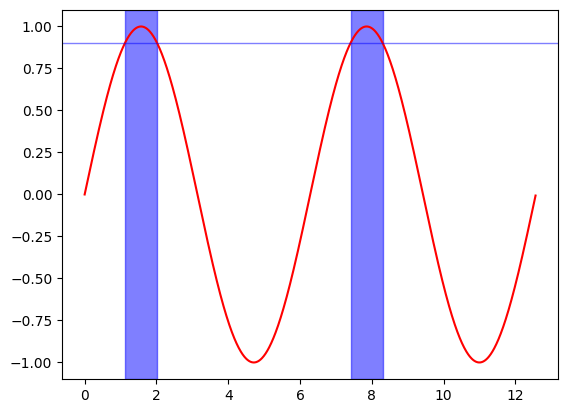

In [11]:
fig, ax = plt.subplots()
x = np.arange(0, 4 * np.pi, 0.01)
y = np.sin(x)
ax.plot(x, y, color = 'red')
threshold = 0.90
ax.axhline(threshold, color = "blue", lw = 1, alpha = 0.5)
ax.fill_between(x, 0, 1, where = y > threshold, color = "blue", alpha = 0.5, transform = ax.get_xaxis_transform())

# discrete distribution as horizontal bar chart

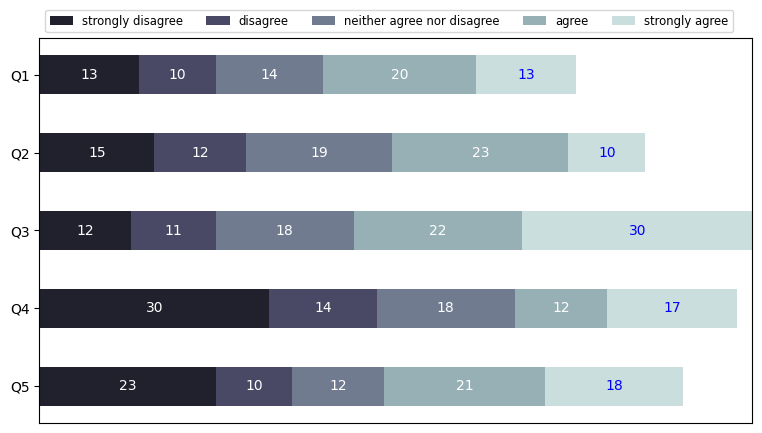

In [27]:
category_names = ["strongly disagree", "disagree", "neither agree nor disagree", "agree", "strongly agree"]

results = {
    "Q1" : [13, 10, 14, 20, 13],
    "Q2" : [15, 12, 19, 23, 10],
    "Q3" : [12, 11, 18, 22, 30],
    "Q4" : [30, 14, 18, 12, 17],
    "Q5" : [23, 10, 12, 21, 18],
}

def survey(results, category_names):
    """
    parameters
    ----------
    results: dict
        this is a survey gotten from field survey.
        retroo
        it matches the length of
    category_names : list of str
        The catehory labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis =1)
    category_colors = plt.colormaps["bone"](np.linspace(0.15, 0.85, data.shape[1]))

    fix, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis = 1).max())
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        start = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left = start, height = 0.5, label = colname, color = color)
        r, g, b, _ = color
        text_color = "white" if r * g * b < 0.5 else "blue"
        ax.bar_label(rects, label_type = "center", color = text_color)
        ax.legend(ncols = len(category_names), bbox_to_anchor = (0,1), loc= "lower left", fontsize = "small")
    return fig, ax
survey(results, category_names)
plt.show()